# Linear Regression Consulting Project

Congratulations! You've been contracted by Hyundai Heavy Industries to help them build a predictive model for some ships. [Hyundai Heavy Industries](http://www.hyundai.eu/en) is one of the world's largest ship manufacturing companies and builds cruise liners.

You've been flown to their headquarters in Ulsan, South Korea to help them give accurate estimates of how many crew members a ship will require.

They are currently building new ships for some customers and want you to create a model and **use it to predict how many crew members the ships will need.**

Here is what the data looks like so far:

    Description: Measurements of ship size, capacity, crew, and age for 158 cruise
    ships.


    Variables/Columns
    Ship Name     1-20
    Cruise Line   21-40
    Age (as of 2013)   46-48
    Tonnage (1000s of tons)   50-56
    passengers (100s)   58-64
    Length (100s of feet)  66-72
    Cabins  (100s)   74-80
    Passenger Density   82-88
    Crew  (100s)   90-96
    
It is saved in a csv file for you called "cruise_ship_info.csv". Your job is to create a regression model that will help predict how many crew members will be needed for future ships. The client also mentioned that they have found that particular cruise lines will differ in acceptable crew counts, so it is most likely an important feature to include in your analysis! 

Once you've created the model and tested it for a quick check on how well you can expect it to perform, make sure you take a look at why it performs so well!

목적 :  일부 선박의 예측 모델을 구축 할 수 있습니다. 

한국 울산에있는 본부로 이동하여 선박에 필요한 승무원 수를 정확하게 추정 할 수 있습니다.

현재 일부 고객을 위해 새로운 선박을 제작하고 있으며 모델을 생성하고 

**선박에 필요한 승무원 수를 예측하는 데 사용하기를 원합니다.**

In [1]:
import pandas as pd 
import random as rd
import missingno as msno   # missingno =>  missingno 패키지를 사용하면 누락데이터에 대한 시각화

df = pd.read_csv('./cruise_ship_info.csv')

# 데이터 모양

설명 : 158 크루즈의 선박 크기, 용량, 승무원 및 연령 측정


## 변수 / 열(Variables/Columns)



- 선박 이름(Ship Name) 1-20

- 크루즈 라인(Cruise Line) 21-40

- 연령(Age) (2013 년 기준) 46-48 # 배나이

- 톤수(Tonnage) (1000 톤) 50-56

- 승객(passengers) (100 대) 58-64

- 길이(Length) (100s) 66-72

- 캐빈(Cabins) (100) 74-80

- 여객 밀도(Passenger) 82-88

- 승무원 (100 대)(Crew:100s) 90-96



기준은 승무원 수 !

NameError: name 'Nan' is not defined

In [2]:
df.head()

,Ship_name,Cruise_line,Age,Tonnage,passengers,length,cabins,passenger_density,crew
0,Journey,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
1,Quest,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
2,Celebration,Carnival,26,47.262,14.86,7.22,7.43,31.80,6.70
3,Conquest,Carnival,11,110.000,29.74,9.53,14.88,36.99,19.10
4,Destiny,Carnival,17,101.353,26.42,8.92,13.21,38.36,10.00


In [3]:
df['Cruise_line'].value_counts()

Royal_Caribbean      23
Carnival             22
Princess             17
Holland_American     14
Norwegian            13
Costa                11
Celebrity            10
MSC                   8
Star                  6
P&O                   6
Regent_Seven_Seas     5
Silversea             4
Seabourn              3
Cunard                3
Oceania               3
Windstar              3
Azamara               2
Disney                2
Crystal               2
Orient                1
Name: Cruise_line, dtype: int64

In [4]:
df.iloc[:,:2]

,Ship_name,Cruise_line
0,Journey,Azamara
1,Quest,Azamara
2,Celebration,Carnival
3,Conquest,Carnival
4,Destiny,Carnival
...,...,...
153,Taurus,Star
154,Virgo,Star
155,Spirit,Windstar
156,Star,Windstar


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Ship_name          158 non-null    object 
 1   Cruise_line        158 non-null    object 
 2   Age                158 non-null    int64  
 3   Tonnage            158 non-null    float64
 4   passengers         158 non-null    float64
 5   length             158 non-null    float64
 6   cabins             158 non-null    float64
 7   passenger_density  158 non-null    float64
 8   crew               158 non-null    float64
dtypes: float64(6), int64(1), object(2)
memory usage: 11.2+ KB


In [6]:
import matplotlib.pyplot as plt   # 맷폴렛- 그래프
import seaborn as sns
# ignore warnings
import warnings    # 워닝 방지
warnings.filterwarnings('ignore')

plt.style.use('seaborn')
sns.set(font_scale=2.5)
%matplotlib inline

In [7]:
# 통계치 확인  

df.describe()

,Age,Tonnage,passengers,length,cabins,passenger_density,crew
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,15.689873,71.284671,18.457405,8.130633,8.830000,39.900949,7.794177
std,7.615691,37.229540,9.677095,1.793474,4.471417,8.639217,3.503487
min,4.000000,2.329000,0.660000,2.790000,0.330000,17.700000,0.590000
25%,10.000000,46.013000,12.535000,7.100000,6.132500,34.570000,5.480000
50%,14.000000,71.899000,19.500000,8.555000,9.570000,39.085000,8.150000
75%,20.000000,90.772500,24.845000,9.510000,10.885000,44.185000,9.990000
max,48.000000,220.000000,54.000000,11.820000,27.000000,71.430000,21.000000


In [89]:
# 결측치는 없고 
df.isnull().count()

Ship_name            158
Cruise_line          158
Age                  158
Tonnage              158
passengers           158
length               158
cabins               158
passenger_density    158
crew                 158
dtype: int64

In [8]:
# 결측치는 없고 
df.isnull().sum()

Ship_name            0
Cruise_line          0
Age                  0
Tonnage              0
passengers           0
length               0
cabins               0
passenger_density    0
crew                 0
dtype: int64

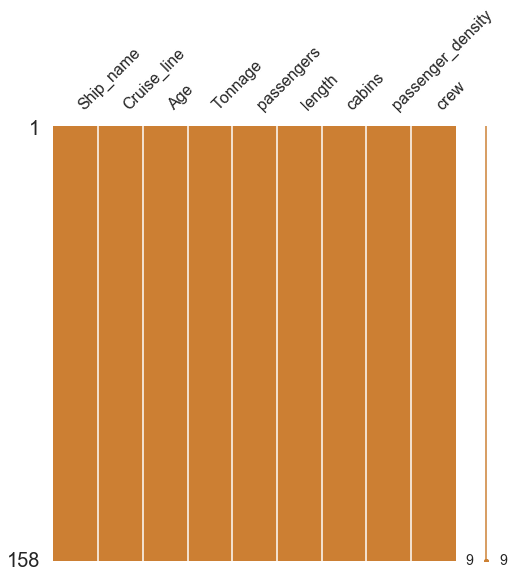

In [9]:
msno.matrix(df = df.iloc[:,:],figsize=(8,8), color = (0.8,0.5,0.2))

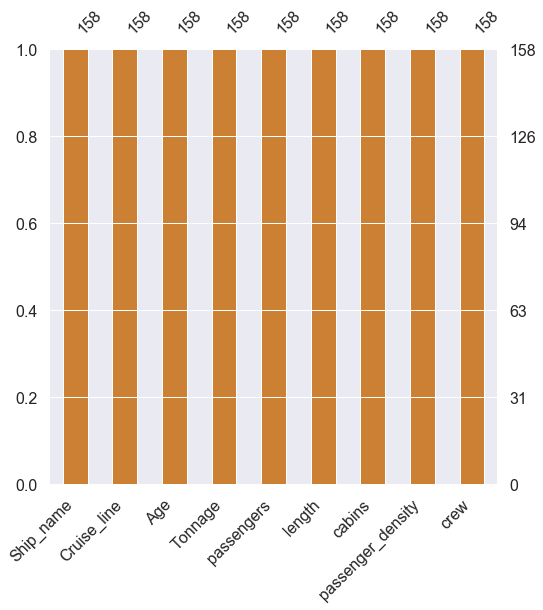

In [10]:
msno.bar(df = df.iloc[:,:], figsize=(8,8), color=(0.8, 0.5, 0.2))

In [11]:
df.columns ,len(df.columns)

(Index(['Ship_name', 'Cruise_line', 'Age', 'Tonnage', 'passengers', 'length',
        'cabins', 'passenger_density', 'crew'],
       dtype='object'),
 9)

In [12]:
df.shape

(158, 9)

In [13]:
crew_cnt = df['crew'].value_counts()

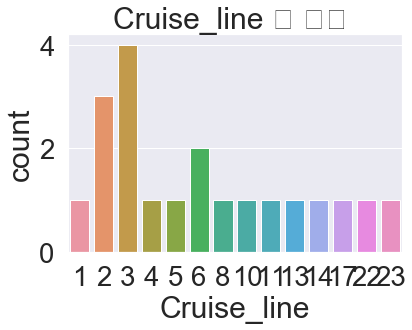

In [14]:
sns.countplot(df['Cruise_line'].value_counts(), data=df)
plt.title("Cruise_line 당 개수 ")
plt.show()

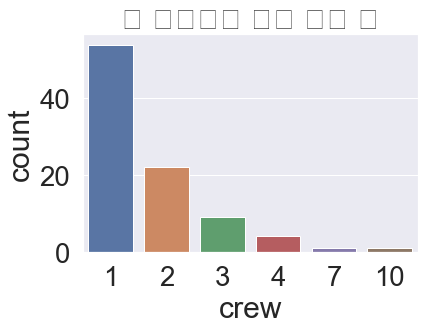

In [15]:
sns.countplot(df['crew'].value_counts(), data=df)
plt.title("각 크루즈당 평균 선원 수")
plt.show()

In [16]:
# 그룹화 해서 평균 
df_passengers= df[['crew','passengers']].groupby(['crew'], as_index=True)
df_passengers.mean()

,passengers
crew,
0.59,0.660000
0.60,0.940000
0.88,1.625000
1.46,3.940000
1.60,2.080000
...,...
13.00,19.560000
13.13,39.590000
13.60,41.246667


In [17]:
df.columns

Index(['Ship_name', 'Cruise_line', 'Age', 'Tonnage', 'passengers', 'length',
       'cabins', 'passenger_density', 'crew'],
      dtype='object')

Spirit       4
Star         3
Legend       3
Voyager      2
Dawn         2
            ..
Saphire      1
Oosterdam    1
Arcadia      1
Maasdam      1
Millenium    1
Name: Ship_name, Length: 138, dtype: int64


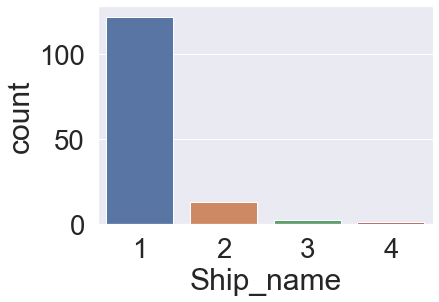

Royal_Caribbean      23
Carnival             22
Princess             17
Holland_American     14
Norwegian            13
Costa                11
Celebrity            10
MSC                   8
Star                  6
P&O                   6
Regent_Seven_Seas     5
Silversea             4
Seabourn              3
Cunard                3
Oceania               3
Windstar              3
Azamara               2
Disney                2
Crystal               2
Orient                1
Name: Cruise_line, dtype: int64


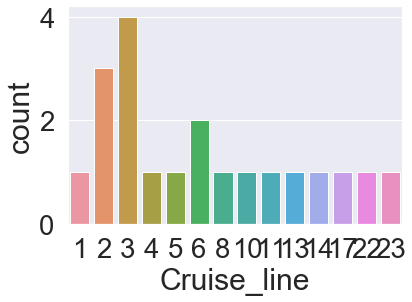

12    13
10    12
11    10
9     10
13     9
14     9
15     8
6      8
17     7
21     7
16     6
22     6
18     6
27     5
25     5
20     5
5      5
19     4
23     4
8      3
29     3
7      3
24     2
48     1
44     1
26     1
28     1
31     1
36     1
40     1
4      1
Name: Age, dtype: int64


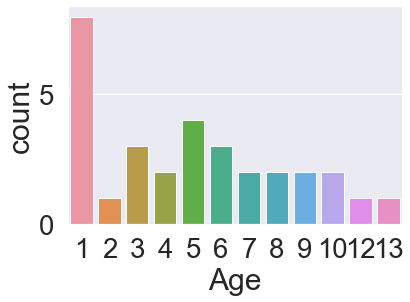

70.367     8
30.277     7
91.000     5
138.000    5
90.090     4
          ..
108.977    1
47.262     1
101.353    1
40.053     1
59.652     1
Name: Tonnage, Length: 94, dtype: int64


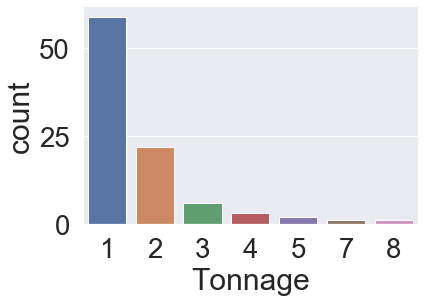

20.52    7
19.50    5
31.14    5
29.74    4
20.32    4
        ..
20.76    1
13.44    1
19.28    1
9.52     1
37.00    1
Name: passengers, Length: 104, dtype: int64


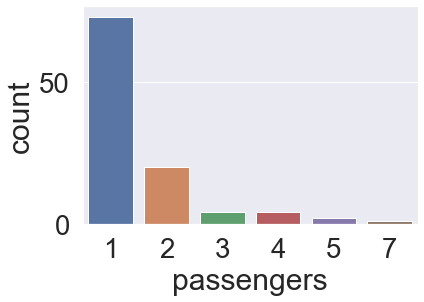

9.51    13
8.55     8
9.65     7
9.64     5
9.63     5
        ..
7.04     1
6.92     1
7.90     1
9.36     1
9.00     1
Name: length, Length: 80, dtype: int64


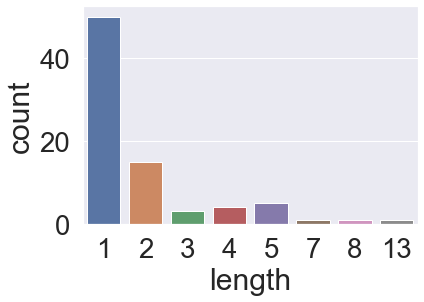

9.75     9
15.57    7
10.20    7
14.87    4
10.50    4
        ..
7.95     1
6.54     1
9.67     1
3.83     1
6.32     1
Name: cabins, Length: 98, dtype: int64


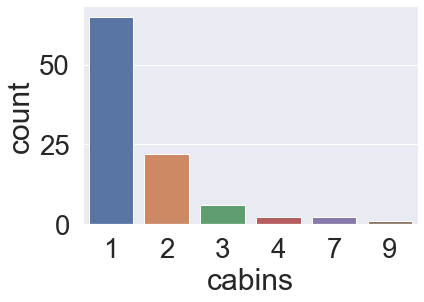

34.29    7
44.32    5
36.02    4
36.99    4
44.78    4
        ..
32.56    1
38.36    1
29.88    1
40.65    1
40.50    1
Name: passenger_density, Length: 109, dtype: int64


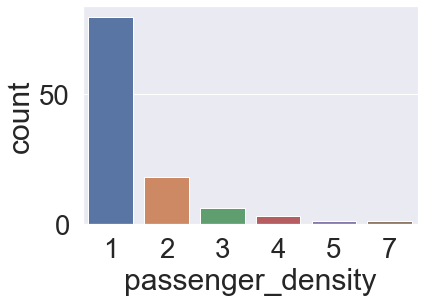

9.20     10
9.00      7
9.99      4
4.00      4
12.00     4
         ..
9.59      1
3.85      1
1.97      1
9.87      1
6.12      1
Name: crew, Length: 91, dtype: int64


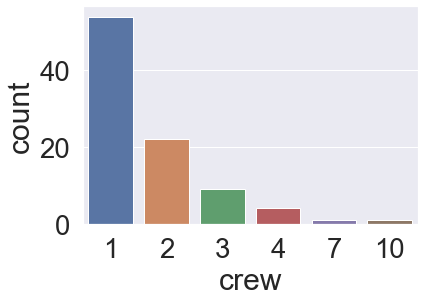

In [18]:
for col in  df.columns: 
    sns.countplot(df[col].value_counts(), data=df)
    print(df[col].value_counts())
    print('='*50)
    plt.show()
#     print(col)

In [19]:
df.columns

Index(['Ship_name', 'Cruise_line', 'Age', 'Tonnage', 'passengers', 'length',
       'cabins', 'passenger_density', 'crew'],
      dtype='object')

In [20]:
df['crew']

0       3.55
1       3.55
2       6.70
3      19.10
4      10.00
       ...  
153     0.59
154    12.00
155     0.88
156     0.88
157     1.80
Name: crew, Length: 158, dtype: float64

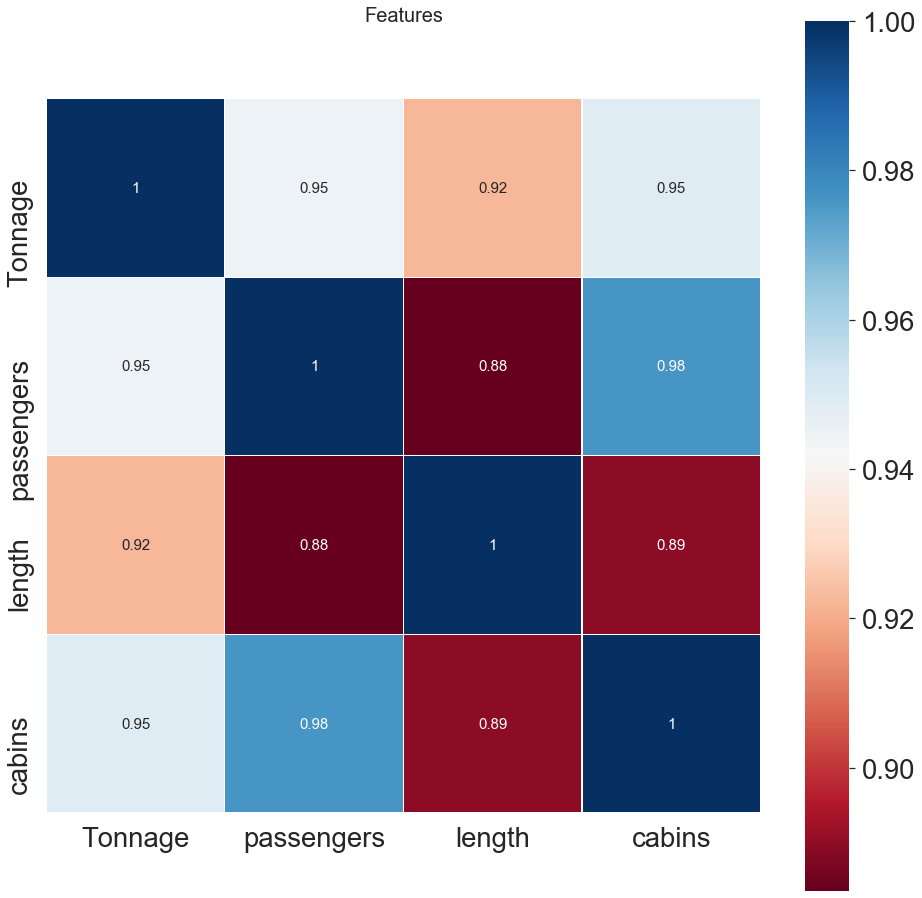

In [88]:
# 필요 특징만 꺼내서 진행 - 1차
heatmap_data = df[[ 'Tonnage', 'passengers', 'length',
       'cabins']] 

colormap = plt.cm.RdBu
plt.figure(figsize=(16, 16))
plt.title('Features', y=1.1, size=20)

sns.heatmap( heatmap_data.astype(float).corr(), linewidths=0.1, vmax=1.0,
           square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={"size": 15})


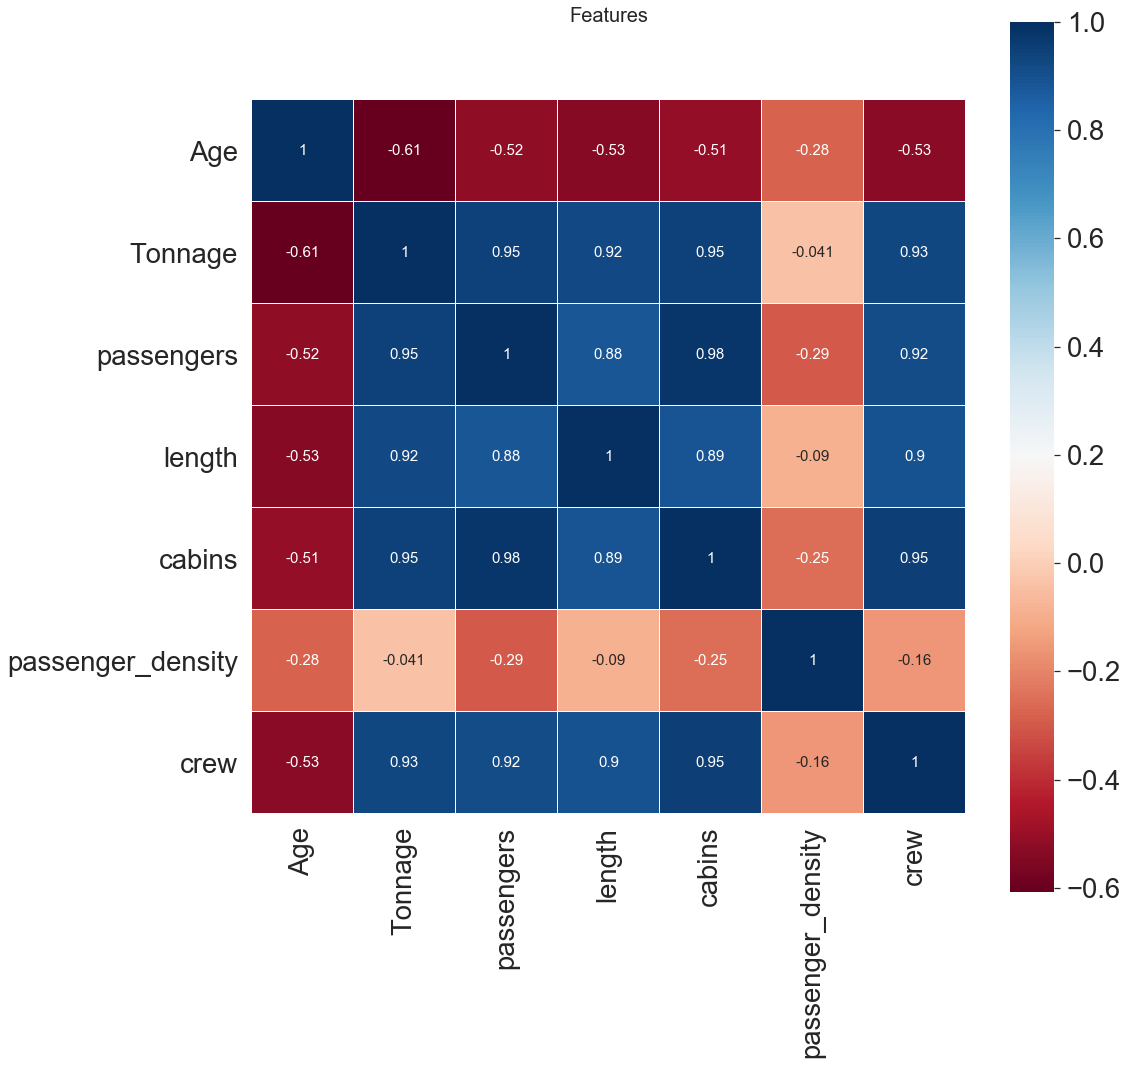

In [21]:
# 필요 특징만 꺼내서 진행 - 1차
heatmap_data = df[['Age', 'Tonnage', 'passengers', 'length',
       'cabins', 'passenger_density', 'crew']] 

colormap = plt.cm.RdBu
plt.figure(figsize=(16, 16))
plt.title('Features', y=1.1, size=20)

sns.heatmap( heatmap_data.astype(float).corr(), linewidths=0.1, vmax=1.0,
           square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={"size": 15})


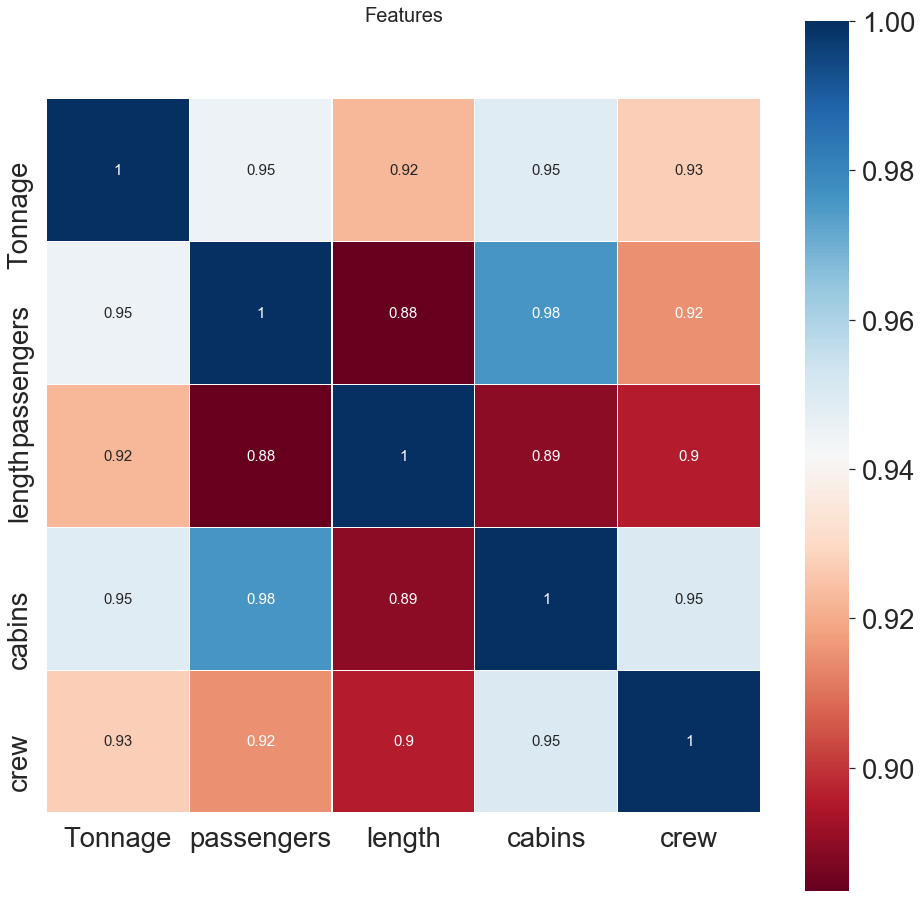

In [22]:
# 필요 특징만 꺼내서 진행 
heatmap_data = df[['Tonnage', 'passengers', 'length',
       'cabins', 'crew']] 

colormap = plt.cm.RdBu
plt.figure(figsize=(16, 16))
plt.title('Features', y=1.1, size=20)

sns.heatmap( heatmap_data.astype(float).corr(), linewidths=0.1, vmax=1.0,
           square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={"size": 15})


In [23]:
df_tmp_1 = df[['Ship_name','Tonnage', 'passengers', 'length','cabins']]

In [24]:
df_tmp_2 = df[['Cruise_line','Tonnage', 'passengers', 'length','cabins']]

In [25]:
df_tmp_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Ship_name   158 non-null    object 
 1   Tonnage     158 non-null    float64
 2   passengers  158 non-null    float64
 3   length      158 non-null    float64
 4   cabins      158 non-null    float64
dtypes: float64(4), object(1)
memory usage: 6.3+ KB


In [26]:
df_tmp_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Cruise_line  158 non-null    object 
 1   Tonnage      158 non-null    float64
 2   passengers   158 non-null    float64
 3   length       158 non-null    float64
 4   cabins       158 non-null    float64
dtypes: float64(4), object(1)
memory usage: 6.3+ KB


In [27]:
df_tmp_1 = pd.get_dummies(df_tmp_1, columns=['Ship_name'], prefix='Cruise_line')
df_tmp_2 = pd.get_dummies(df_tmp_2, columns=['Cruise_line'], prefix='Ship_name')

In [28]:
a = df_tmp_1.iloc[:,1:]
a.dtypes

passengers               float64
length                   float64
cabins                   float64
Cruise_line_Adventure      uint8
Cruise_line_Allegra        uint8
                          ...   
Cruise_line_Wonder         uint8
Cruise_line_Xpedition      uint8
Cruise_line_Zaandam        uint8
Cruise_line_Zenith         uint8
Cruise_line_Zuiderdam      uint8
Length: 141, dtype: object

In [29]:
b = df_tmp_2.iloc[:,1:]
b.dtypes

passengers                     float64
length                         float64
cabins                         float64
Ship_name_Azamara                uint8
Ship_name_Carnival               uint8
Ship_name_Celebrity              uint8
Ship_name_Costa                  uint8
Ship_name_Crystal                uint8
Ship_name_Cunard                 uint8
Ship_name_Disney                 uint8
Ship_name_Holland_American       uint8
Ship_name_MSC                    uint8
Ship_name_Norwegian              uint8
Ship_name_Oceania                uint8
Ship_name_Orient                 uint8
Ship_name_P&O                    uint8
Ship_name_Princess               uint8
Ship_name_Regent_Seven_Seas      uint8
Ship_name_Royal_Caribbean        uint8
Ship_name_Seabourn               uint8
Ship_name_Silversea              uint8
Ship_name_Star                   uint8
Ship_name_Windstar               uint8
dtype: object

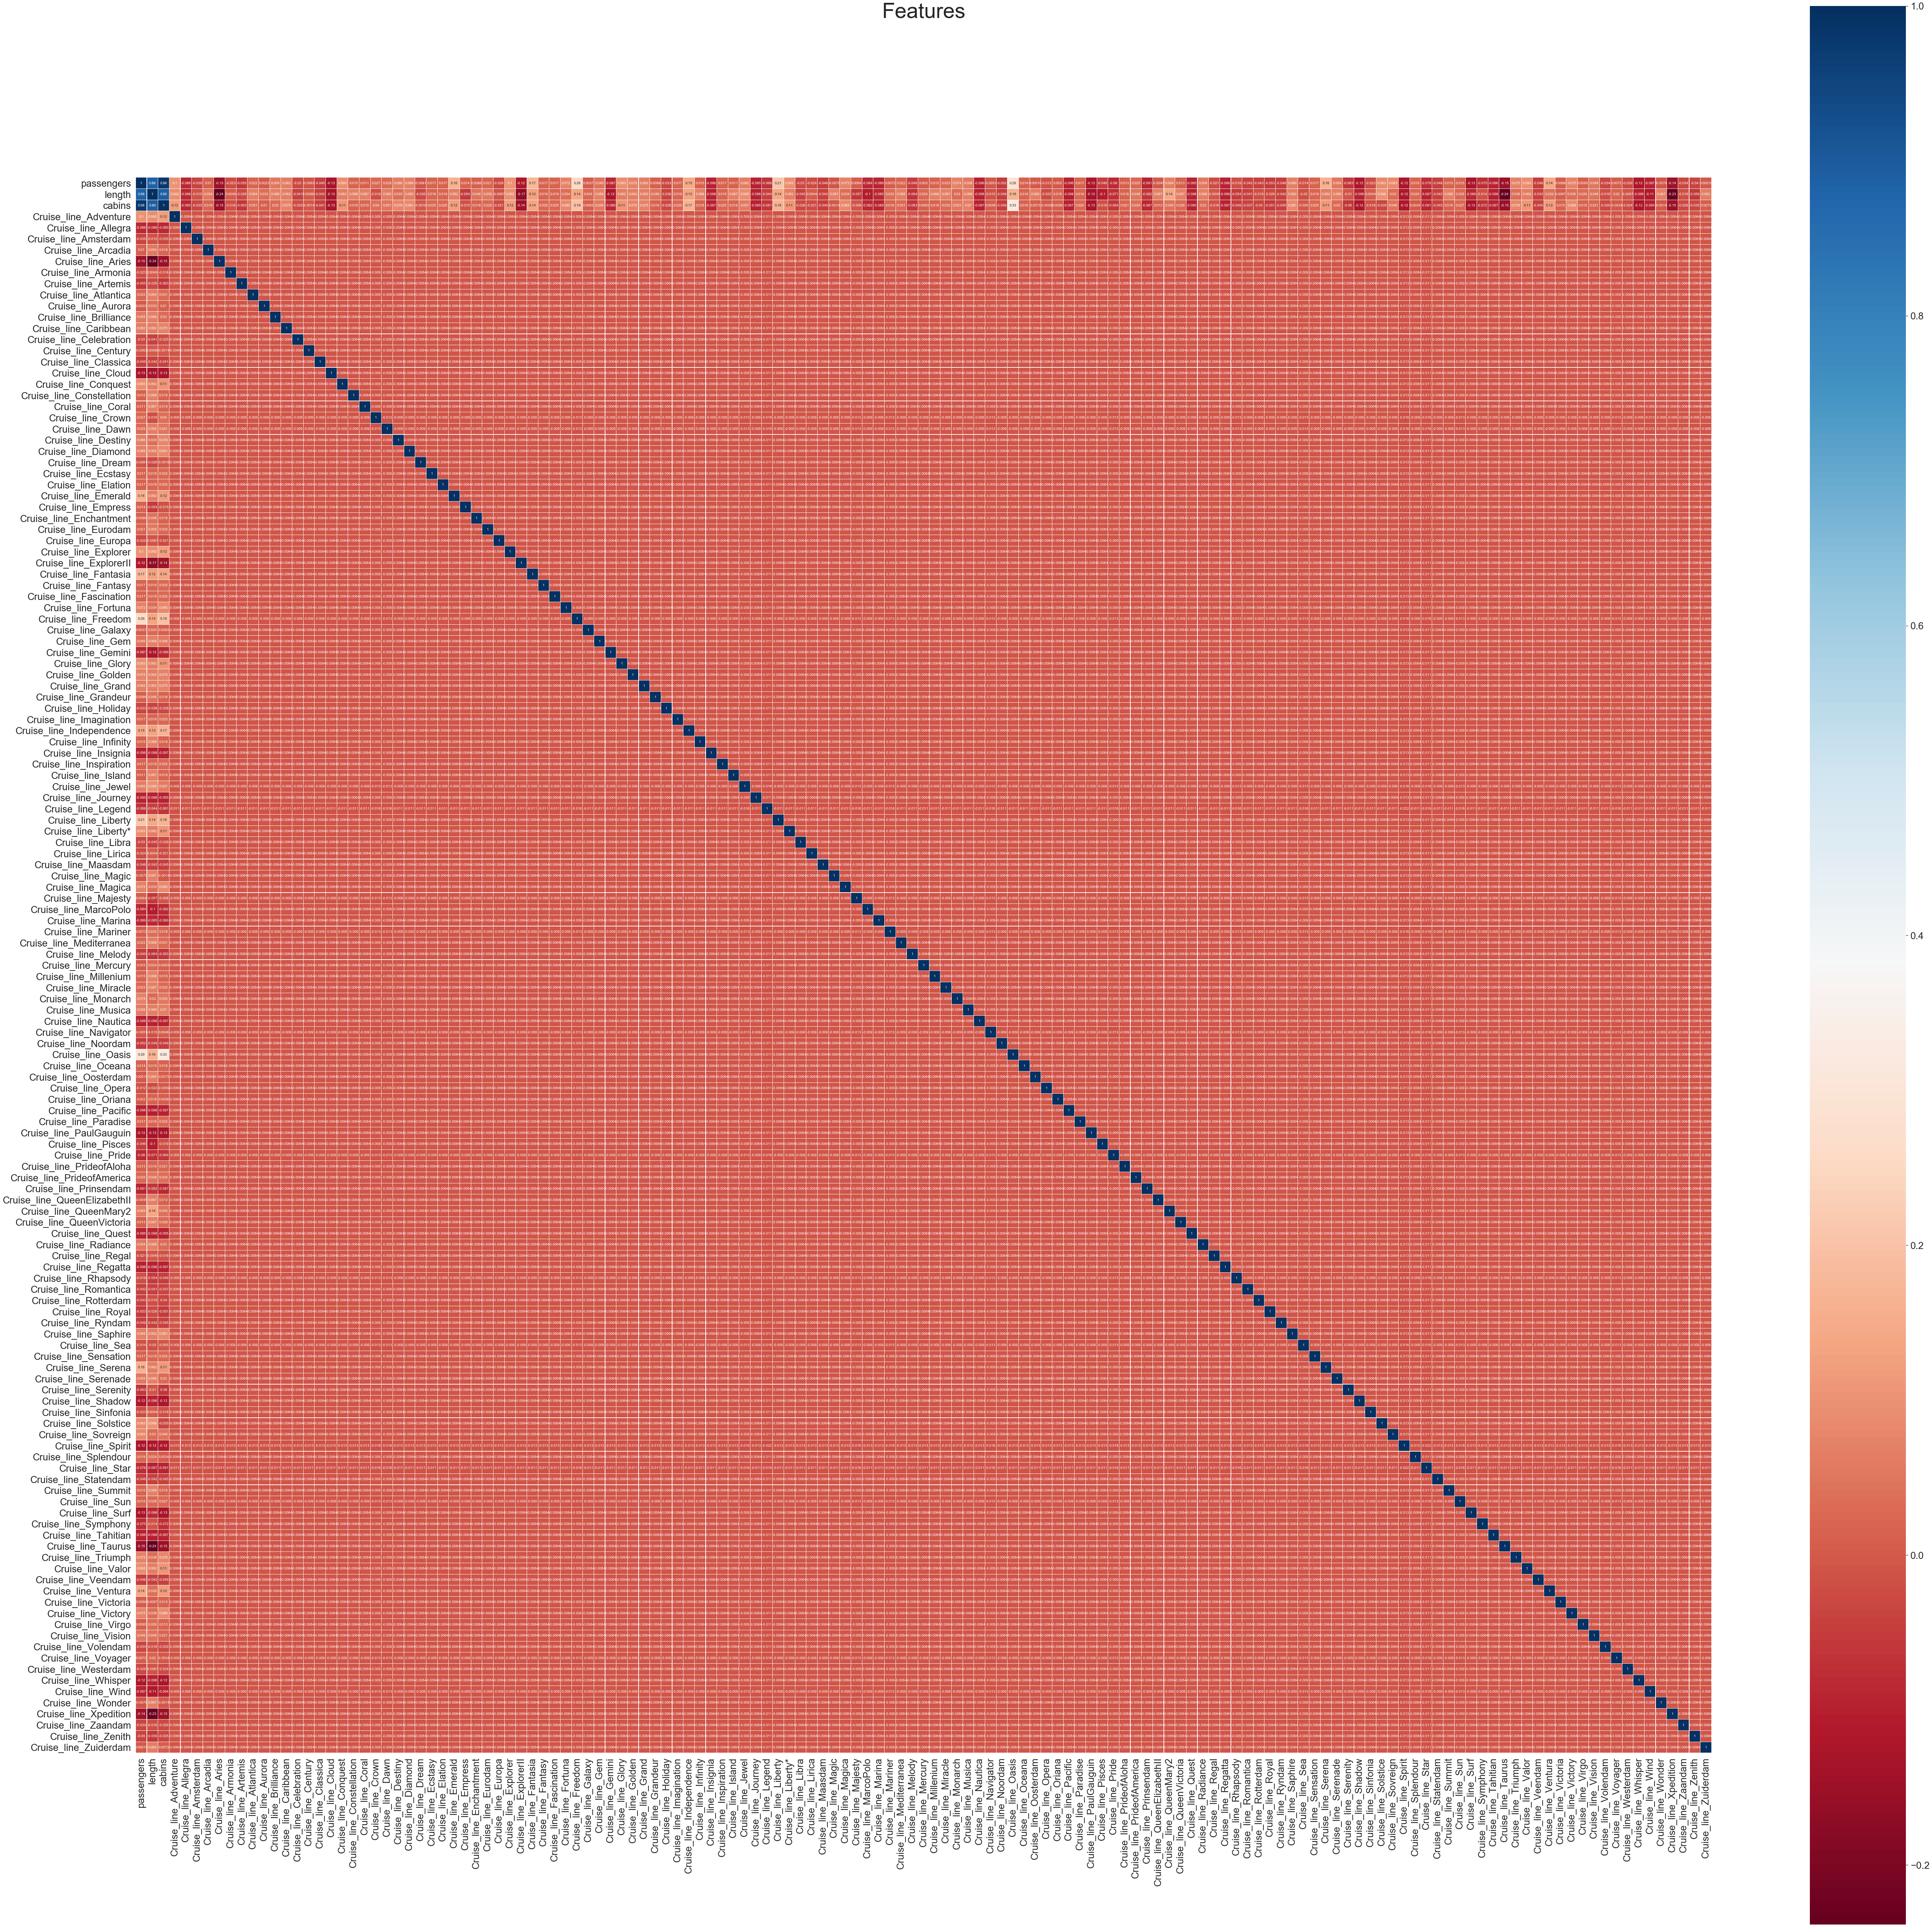

In [30]:
# 필요 특징만 꺼내서 진행 
heatmap_data = a

colormap = plt.cm.RdBu
plt.figure(figsize=(100, 100))
plt.title('Features', y=1.1, size=60)

sns.heatmap( heatmap_data.astype(float).corr(), linewidths=0.1, vmax=1.0,
           square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={"size": 10})


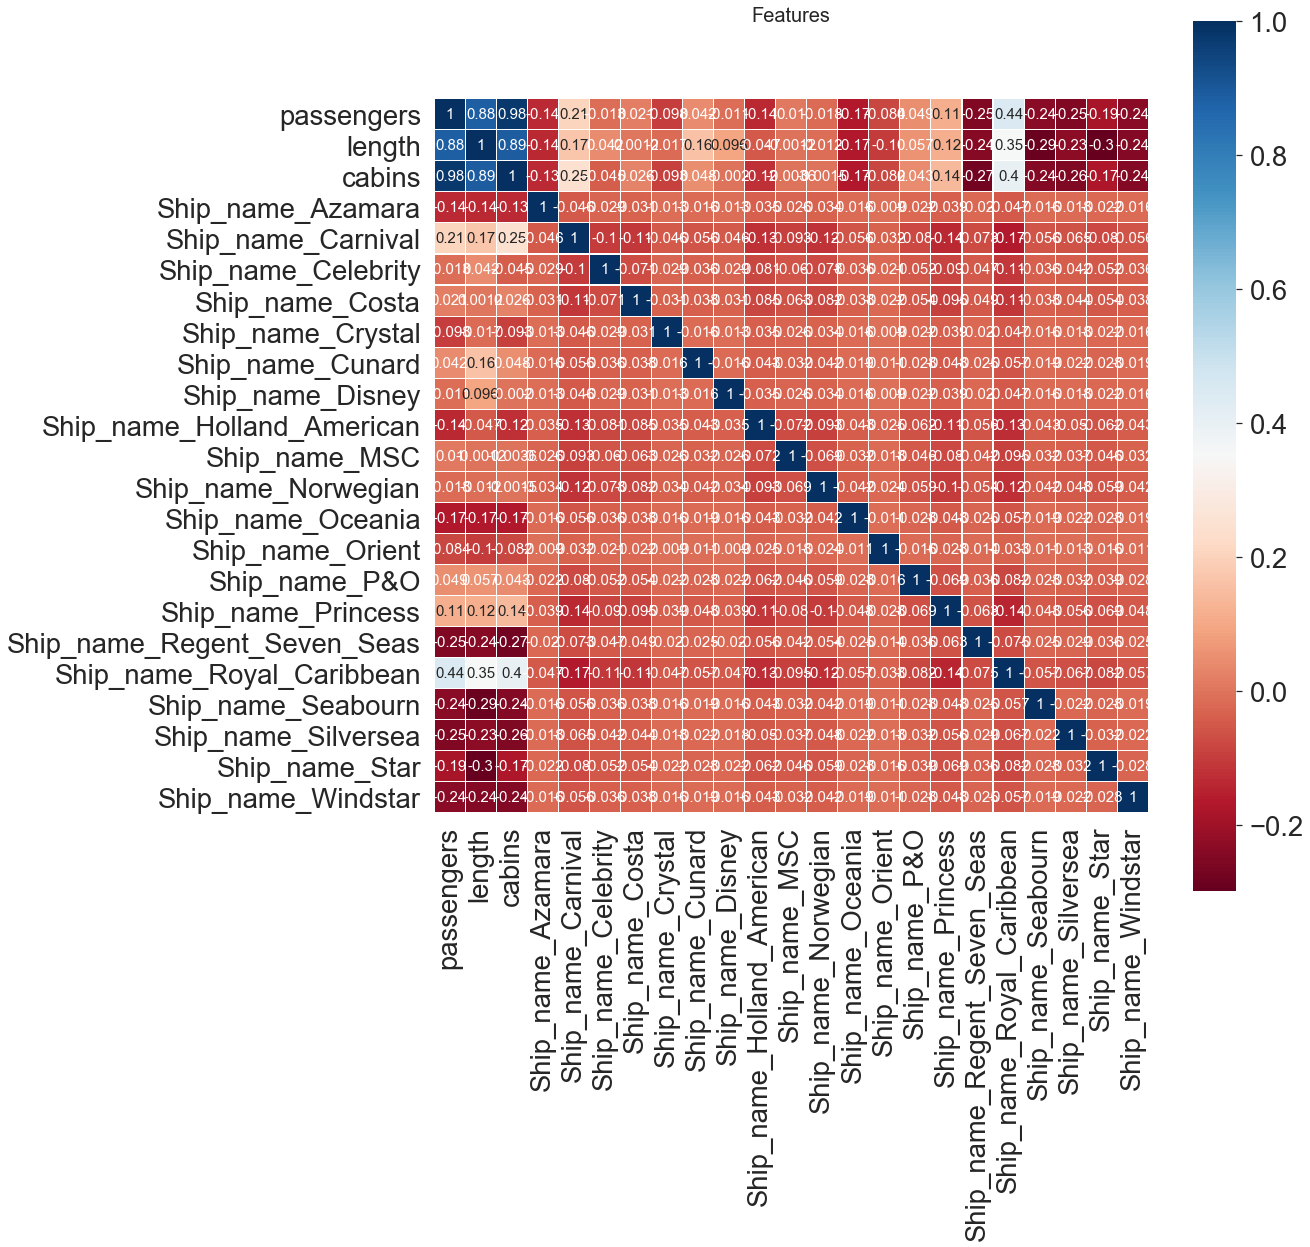

In [31]:
# 필요 특징만 꺼내서 진행 
heatmap_data = b

colormap = plt.cm.RdBu
plt.figure(figsize=(16, 16))
plt.title('Features', y=1.1, size=20)

sns.heatmap( heatmap_data.astype(float).corr(), linewidths=0.1, vmax=1.0,
           square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={"size": 15})


In [32]:
# x_train, x_test, y_train, y_test = train_test_split(df_d, df_t, test_size=0.3, random_state=777)

In [33]:
# x_train.shape, x_test.shape, y_train.shape, y_test.shape 

In [34]:
# x_train, x_test, y_train, y_test 

In [35]:
# test_1 = pd.get_dummies(df, columns=['Ship_name'], prefix='Ship_name')
# test_1.head()

In [36]:
# test_2 = pd.get_dummies(df, columns=['Cruise_line'], prefix='Cruise_line')
# test_2.head()

In [37]:
# importing all the requested ML packages
from sklearn.ensemble import RandomForestClassifier  # 랜덤포레스트
from sklearn.model_selection import train_test_split # traning set을 쉽게 나눠주는 함수
from sklearn import metrics  

# 모델 생성 및 예측 

In [38]:
# importing all the requested ML packages
from sklearn.ensemble import RandomForestClassifier  # 랜덤포레스트
from sklearn.model_selection import train_test_split # traning set을 쉽게 나눠주는 함수
from sklearn import metrics  
from sklearn import preprocessing

from sklearn.preprocessing import StandardScaler

from sklearn import linear_model
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error

from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import LinearRegression

In [39]:
scaler = StandardScaler()
scaler_columns =  ['Tonnage', 'passengers', 'length','cabins']
df[scaler_columns] = scaler.fit_transform(df[scaler_columns])

In [40]:
X = df[scaler_columns]
y = df['crew']

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=777)

In [42]:
# 표준화 함수 정의
sc = preprocessing.StandardScaler()
# 데이터를 표준화
sc.fit(X_train)
X_train_std = sc.transform(X_train)
sc.fit(X_test)
X_test_std = sc.transform(X_test)

In [43]:
# RANSACRegressor
clf_ = RANSACRegressor(random_state=None) 

clf_.fit(X_train, y_train)
y_pred  = clf_.predict(X_test)

print('Mean Squared Error :',mean_squared_error(y_test,y_pred))
print('Mean Absolute Error :',mean_absolute_error(y_test,y_pred))
print("train 학습 정확도 :", clf_.score(X_train, y_train)) 
print("test 학습 정확도 :", clf_.score(X_test, y_test))

Mean Squared Error : 1.2772378484573845
Mean Absolute Error : 0.790373422296535
train 학습 정확도 : 0.9327771531178364
test 학습 정확도 : 0.88739287515613


In [44]:
# LinearRegression
clf_ = linear_model.LinearRegression(normalize=False) 

clf_.fit(X_train, y_train)
y_pred  = clf_.predict(X_test)

print('Mean Squared Error :',mean_squared_error(y_test,y_pred))
print('Mean Absolute Error :',mean_absolute_error(y_test,y_pred))
print("train 학습 정확도 :", clf_.score(X_train, y_train)) 
print("test 학습 정확도 :", clf_.score(X_test, y_test))


Mean Squared Error : 1.2683528060507225
Mean Absolute Error : 0.7915209198035815
train 학습 정확도 : 0.9362490907028338
test 학습 정확도 : 0.8881762210934105


In [45]:
# Ridge
clf_ = linear_model.Ridge(alpha=.5)

clf_.fit(X_train, y_train)
y_pred  = clf_.predict(X_test)

print('Mean Squared Error :',mean_squared_error(y_test,y_pred))
print('Mean Absolute Error :',mean_absolute_error(y_test,y_pred))
print("train 학습 정확도 :", clf_.score(X_train, y_train)) 
print("test 학습 정확도 :", clf_.score(X_test, y_test))

Mean Squared Error : 1.2717630735637042
Mean Absolute Error : 0.7970384939752567
train 학습 정확도 : 0.9356973169581527
test 학습 정확도 : 0.8878755563268214


In [46]:
import statsmodels.api as sm

In [47]:
X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   crew   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     385.5
Date:                Wed, 06 May 2020   Prob (F-statistic):           8.63e-62
Time:                        09:41:18   Log-Likelihood:                -143.90
No. Observations:                 110   AIC:                             297.8
Df Residuals:                     105   BIC:                             311.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.7267      0.087     88.391      0.000       7.553       7.900
Tonnage        0.4006      0.366      1.094      0.277      -0.326       1.127
passengers    -1.2090      0.403     -3.004      0.003      -2.007      -0.411
length         0.5822      0.223      2.610      0.010       0.140       1.025
cabins         3.6250      0.424      8.543      0.000       2.784       4.466
==============================================================================
Omnibus:                      137.515   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4841.671
Skew:                           4.218   Prob(JB):                         0.00
Kurtosis:                      34.388   Cond. No.                         12.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
# 다중 공선성
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['features'] = X_train.columns
vif.round(1)

,VIF Factor,features
0,1.0,const
1,17.6,Tonnage
2,22.1,passengers
3,6.3,length
4,24.9,cabins


# 다시 

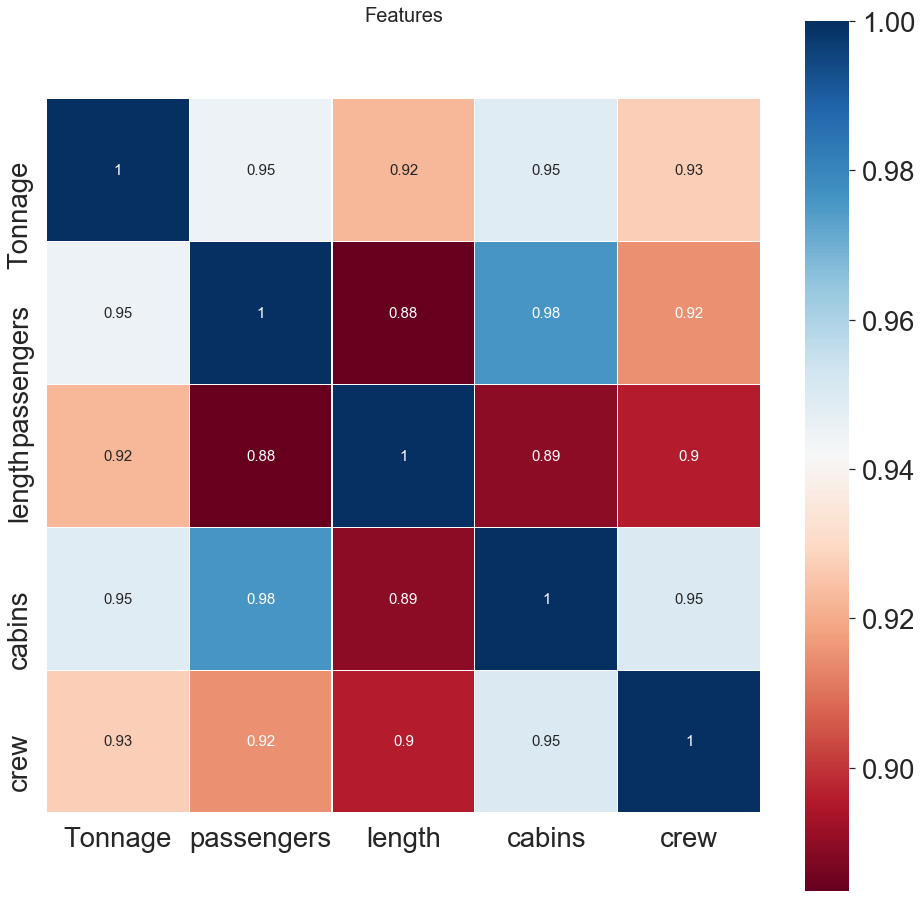

In [49]:
# 필요 특징만 꺼내서 진행 - 1차
heatmap_data = df[['Tonnage', 'passengers', 'length',
       'cabins',  'crew']] 

colormap = plt.cm.RdBu
plt.figure(figsize=(16, 16))
plt.title('Features', y=1.1, size=20)

sns.heatmap( heatmap_data.astype(float).corr(), linewidths=0.1, vmax=1.0,
           square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={"size": 15})

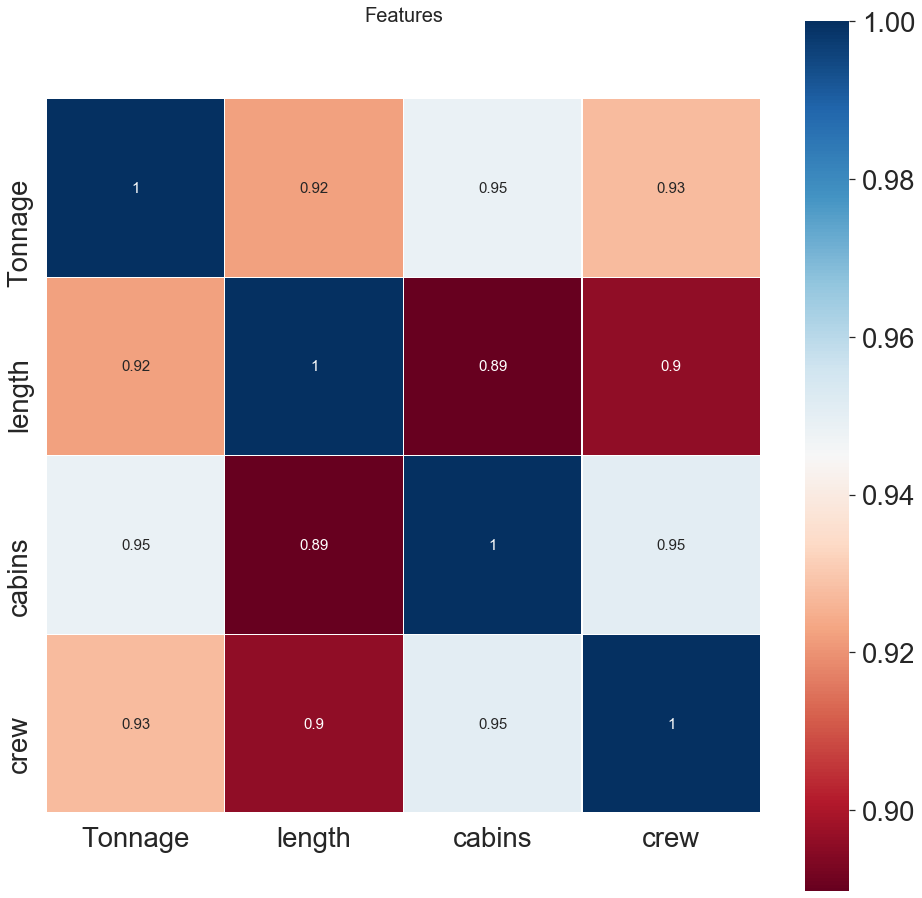

In [50]:
# 필요 특징만 꺼내서 진행 - 1차
heatmap_data = df[['Tonnage',  'length', 'cabins',  'crew']] 

colormap = plt.cm.RdBu
plt.figure(figsize=(16, 16))
plt.title('Features', y=1.1, size=20)

sns.heatmap( heatmap_data.astype(float).corr(), linewidths=0.1, vmax=1.0,
           square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={"size": 15})

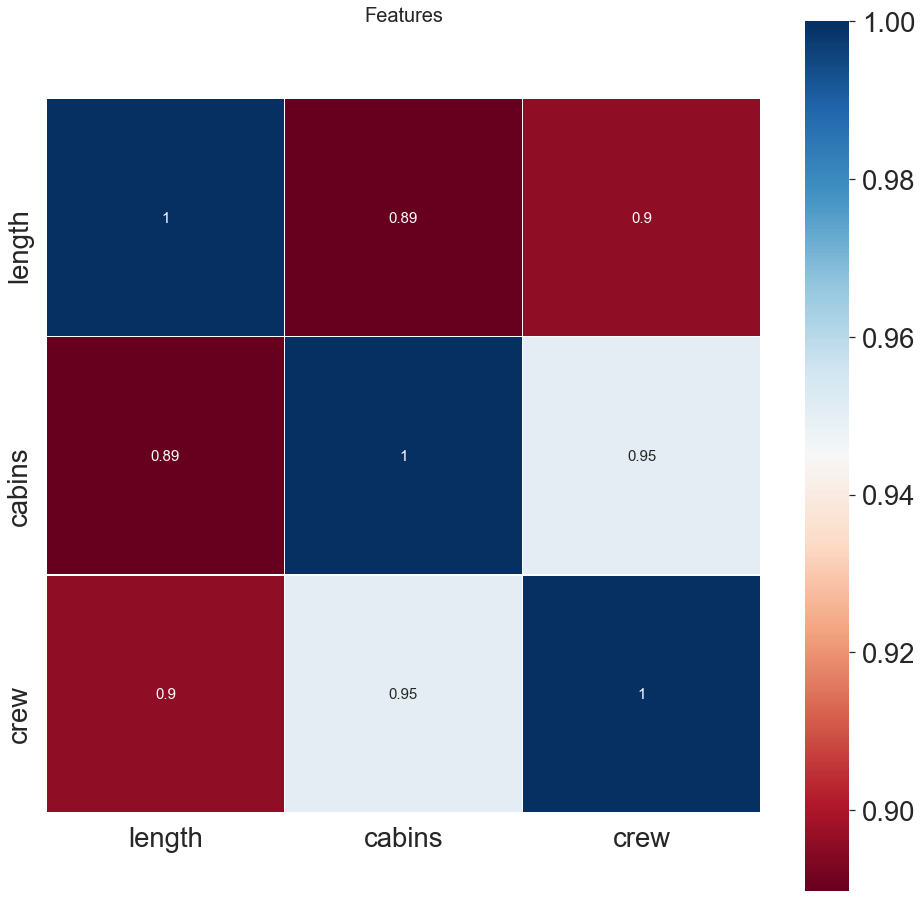

In [51]:
# 필요 특징만 꺼내서 진행 - 1차
heatmap_data = df[['length', 'cabins',  'crew']] 

colormap = plt.cm.RdBu
plt.figure(figsize=(16, 16))
plt.title('Features', y=1.1, size=20)

sns.heatmap( heatmap_data.astype(float).corr(), linewidths=0.1, vmax=1.0,
           square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={"size": 15})

In [52]:
scaler = StandardScaler()
scaler_columns =  ['Tonnage', 'length','cabins']
df[scaler_columns] = scaler.fit_transform(df[scaler_columns])

In [53]:
X = df[scaler_columns]
y = df['crew']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=777)

In [54]:
# 표준화 함수 정의
sc = preprocessing.StandardScaler()
# 데이터를 표준화
sc.fit(X_train)
X_train_std = sc.transform(X_train)
sc.fit(X_test)
X_test_std = sc.transform(X_test)

In [55]:
# LinearRegression
clf_ = linear_model.LinearRegression(normalize=False) 

clf_.fit(X_train, y_train)
y_pred  = clf_.predict(X_test)

print('Mean Squared Error :',mean_squared_error(y_test,y_pred))
print('Mean Absolute Error :',mean_absolute_error(y_test,y_pred))
print("train 학습 정확도 :", clf_.score(X_train, y_train)) 
print("test 학습 정확도 :", clf_.score(X_test, y_test))

Mean Squared Error : 1.4170314928979353
Mean Absolute Error : 0.8570257196338439
train 학습 정확도 : 0.9307718940120089
test 학습 정확도 : 0.8750680286986677


In [56]:
X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   crew   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     475.1
Date:                Wed, 06 May 2020   Prob (F-statistic):           2.74e-61
Time:                        09:41:19   Log-Likelihood:                -148.43
No. Observations:                 110   AIC:                             304.9
Df Residuals:                     106   BIC:                             315.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.7253      0.091     85.211      0.000       7.546       7.905
Tonnage        0.1208      0.367      0.329      0.743      -0.608       0.849
length         0.5629      0.231      2.434      0.017       0.104       1.021
cabins         2.7319      0.314      8.702      0.000       2.110       3.354
==============================================================================
Omnibus:                      130.335   Durbin-Watson:                   2.250
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3904.804
Skew:                           3.928   Prob(JB):                         0.00
Kurtosis:                      31.111   Cond. No.                         8.65
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [59]:
# 다중 공선성
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['features'] = X_train.columns
vif.round(1)

,VIF Factor,features
0,4.8,length
1,4.8,cabins


In [57]:
scaler = StandardScaler()
scaler_columns =  ['length','cabins']
df[scaler_columns] = scaler.fit_transform(df[scaler_columns])

In [76]:
X = df[scaler_columns]
y = df['crew']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=666)

In [77]:
# 표준화 함수 정의
sc = preprocessing.StandardScaler()
# 데이터를 표준화
sc.fit(X_train)
X_train_std = sc.transform(X_train)
sc.fit(X_test)
X_test_std = sc.transform(X_test)

In [78]:
# LinearRegression
clf_ = linear_model.LinearRegression(normalize=False) 

clf_.fit(X_train, y_train)
y_pred  = clf_.predict(X_test)

print('Mean Squared Error :',mean_squared_error(y_test,y_pred))
print('Mean Absolute Error :',mean_absolute_error(y_test,y_pred))
print("train 학습 정확도 :", clf_.score(X_train, y_train)) 
print("test 학습 정확도 :", clf_.score(X_test, y_test))

Mean Squared Error : 0.13968274473988
Mean Absolute Error : 0.22471710053582408
train 학습 정확도 : 0.9407328384175436
test 학습 정확도 : 0.8890061083663753


In [62]:
X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   crew   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     718.5
Date:                Wed, 06 May 2020   Prob (F-statistic):           9.52e-63
Time:                        09:41:19   Log-Likelihood:                -148.49
No. Observations:                 110   AIC:                             303.0
Df Residuals:                     107   BIC:                             311.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.7254      0.090     85.570      0.000       7.546       7.904
length         0.6000      0.201      2.986      0.004       0.202       0.998
cabins         2.8135      0.192     14.676      0.000       2.433       3.193
==============================================================================
Omnibus:                      129.504   Durbin-Watson:                   2.233
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3828.847
Skew:                           3.892   Prob(JB):                         0.00
Kurtosis:                      30.835   Cond. No.                         4.12
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [63]:
# 다중 공선성
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['features'] = X_train.columns
vif.round(1)

,VIF Factor,features
0,1.0,const
1,4.8,length
2,4.8,cabins


In [65]:
scaler = StandardScaler()
scaler_columns = ['Age', 'Tonnage', 'passengers', 'length',
       'cabins', 'passenger_density']
df[scaler_columns] = scaler.fit_transform(df[scaler_columns])

In [79]:
X = df[scaler_columns]
y = df['crew']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

In [80]:
# 표준화 함수 정의
sc = preprocessing.StandardScaler()
# 데이터를 표준화
sc.fit(X_train)
X_train_std = sc.transform(X_train)
sc.fit(X_test)
X_test_std = sc.transform(X_test)

In [81]:
# LinearRegression
clf_ = linear_model.LinearRegression(normalize=False) 

clf_.fit(X_train, y_train)
y_pred  = clf_.predict(X_test)

print('Mean Squared Error :',mean_squared_error(y_test,y_pred))
print('Mean Absolute Error :',mean_absolute_error(y_test,y_pred))
print("train 학습 정확도 :", clf_.score(X_train, y_train)) 
print("test 학습 정확도 :", clf_.score(X_test, y_test))

Mean Squared Error : 0.12949968421335023
Mean Absolute Error : 0.21363331537872418
train 학습 정확도 : 0.9480838168740136
test 학습 정확도 : 0.8647130456132459


In [82]:
# RANSACRegressor
clf_ = RANSACRegressor(random_state=None) 

clf_.fit(X_train, y_train)
y_pred  = clf_.predict(X_test)

print('Mean Squared Error :',mean_squared_error(y_test,y_pred))
print('Mean Absolute Error :',mean_absolute_error(y_test,y_pred))
print("train 학습 정확도 :", clf_.score(X_train, y_train)) 
print("test 학습 정확도 :", clf_.score(X_test, y_test))

Mean Squared Error : 0.1316657475920479
Mean Absolute Error : 0.22233689947141902
train 학습 정확도 : 0.9430091649180836
test 학습 정확도 : 0.8624501820449464


In [69]:
X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   crew   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     252.9
Date:                Wed, 06 May 2020   Prob (F-statistic):           2.86e-59
Time:                        09:44:50   Log-Likelihood:                -6.1713
No. Observations:                 110   AIC:                             26.34
Df Residuals:                     103   BIC:                             45.25
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0197      0.025     -0.782      0.436      -0.070       0.030
Age                  -0.0175      0.033     -0.530      0.597      -0.083       0.048
Tonnage               0.0876      0.145      0.602      0.548      -0.201       0.376
passengers           -0.3440      0.146     -2.349      0.021      -0.635      -0.054
length                0.1702      0.065      2.628      0.010       0.042       0.299
cabins                1.0497      0.125      8.425      0.000       0.803       1.297
passenger_density    -0.0002      0.041     -0.006      0.995      -0.082       0.082
==============================================================================
Omnibus:                      137.507   Durbin-Watson:                   1.959
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4833.624
Skew:                           4.219   Prob(JB):                         0.00
Kurtosis:                      34.359   Cond. No.                         15.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""